# 1. Introduction

## 1.1 What is Explainable AI?
Explainable AI or Interpret-able AI is a technique or set of rules to understand the predictive output produced by machine learning algorithms[1].Machine learning models, especially neural networks are considered as black boxes since they are very complex and their interpretability is very low. The lack of interpretability generates lack of transparency in the predictions. these issues can be a major concern for industries like health care and finance, where the resulting predictions cannot be  blindly considered true.

This is where Explainable AI (XAI) comes in role, it aims to make AI more transparent and interpretable so that we can trust the decisions made by these black box models. As the name suggests it helps explain how the model arrived at a particular result and why making it easier to trust the results given by the model.

The rapid growth of complex AI algorithms has led to great advancements but also made it hard to understand how these models make decisions. Explainable AI tries to find a balance between model performance and how easy it is for people to understand them.

There are two main ways to make AI models more interpretable:

Global Interpretation: This approach looks at the big picture to understand how the model works. It doesn't delve into the deep details of the model but helps identify important features used for predictions.

Local Interpretation: This method goes deeper into understanding specific decisions made by the model for individual instances or cases. It provides more detailed insights into why the model made a particular prediction in a specific situation. It emphasizes on a much specific data point and tries to find out why the predicted output behaved in a certain way due to the impact of a definite feature.[1]


## 1.2 Techniques in Explainable AI 

This project embarks on journey to use Explainable AI to explain how the CatBoost model generates its output or arrives at a decision in as simple way as possible. We will be exploring the global explainability techniques to understand the workings of this black box model. 

We will be using a simple dataset  Hepatitis C Prediction Dataset to try and showcase the working of Catbosst algorithm with the help of explainable AI 

By using global explainability techniques of XAI, we will try to shed some light on the behaviour and reasoning patterns of Catboost model across the Hepatitis C Prediction dataset. This will eventually help us understand which features are more important than others, which features influence the predictions and how these features interact which each other to produce the output.

In this project we will be using 5 techniques to explain the AI model
1. Permutation Feature Importance - One of the classic methods used to achieve global explainability is analysing feature importance. Feature importance leads us to understand which features of the dataset are most crucial to the model for making the predictions, i.e. which features the model puts more weight on and considers it important for making decision. To determine which features are important for the predictions, we can visualise the feature importance scores in form of a graph and to achieve this we can use Permutation feature importance. Essentially, in this technique, the value of the feature is permuted thus breaking the relationship between the feature and actual results is broken, the permutation feature importance now measures increase in the predictions error of the model to understand the feature importance.


2. SHAP - A game theoretic technique called SHAP (SHapley Additive exPlanations) can be used to explain any machine learning model's output[2]. It utilizes the traditional Shapley values from game theory and their related extensions to correlate optimal credit allocation with local explanations[2]. SHAP basically calculates the contribution of each feature to the prediction to explain how the prediction was made for an instance. It uses Shapely values which is calculated as the average of contributions of each features for all possible interactions or coalition for a single prediction. Shapely values shows the impact of each feature on the output of the black box model. 


3. Global Surrogate - A global surrogate model is a simple and easier to understand model that mimics a complicated black-box model. The surrogate model that is used is more simpler to understand and explain. This simple model is also trained on the same input data as the complicated model. It mimics the complicated model to generate the results but is more simplified version of the complicated model so that we can understand the functioning of the complex machine learning model. The surrogate models used are often very easy to understand for humans and can help us understand how a complex model arrived at its decision. 


4. Visualizing as a Tree - Trained Decision Trees are nothing but intuitive flowcharts for making predictions for a given input data. When we visualise this tree for a complex model it becomes a very useful tool for understanding the workings and functioning of a black box model. Using the visualisation of the tree we can easily identify the steps involved in arriving at a particular prediction, allowing us to very easily trace a path to the model's decision. This makes the model more human comprehensible to even non technical audience. These representations can be used to explain the model outcomes to project stakeholders, as it offers a sort of a view into the model's decision making process. 


5. SHAP Dependence Plots - SHAP dependence plots offer a valuable alternative to both partial reliance plots and accumulated local impact plots. While partial dependence plots (PDP) and accumulated local effect plots (ALE) give us an idea of average impacts, SHAP dependence plots go a step further by showing the variability observed on the vertical axis. Specifically, when we take interactions into account, SHAP dependence plots show a much wider spread along the vertical axis compared to the other two methods.


We will explore these techniques to get important insights like significance of features, how individual features influence the decision making process, and lastly visualising how the predictions were made by CatBoost Model throughout this project. We will be able to gradually develop a understand the model workings and the significance of explainable AI in developing transparent, interpretable and comprehensible AI systems. 


## 1.3 Objective 

1. The project aims to utilize the techniques mentioned in the section above to make a complex machine learning model more interpretable. 
2. Catboost algorithm is used as the "black box" algorithm and explainable techniques are used to make it more understandable. 
3. A simple dataset is used to make the inference more coherent, the dataset will be explained in the next section. 
4. In the end, we aim to understand the inner workings of Catboost and generate more human friendly interpretations. This will also help to gain insight of know-how of explainable techniques and how to implement them.


## 1.4 About The Dataset

The dataset used for this project  a simple dataset - Hepatitis C Prediction Dataset. The data set contains values obtained from labs of blood donors and Hepatitis C patients and demographic values[9]. The data was obtained from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/HCV+data.
The dataset contains various features mentioned below that help identify a Hepatitis C patient among the blood donors. 

Content
In the dataset all the features except the feature "Category" and "Sex" are numerical.

The features below specify patient data, to help identify the individual.
1. X - Patient Number - Identifier for each row.
2. Category - This is a categorical variable and specifies the patient diagnosis. There are four categories present in this variable -> 0 = Blood Donor, 0s = suspect Blood  Donor, 1 = Hepatitis, 2 = Fibrosis, 3 = Cirrhosis
3. Age -  Numeric variable - Age in years of the patient.
4. Sex - Categorical Variable - Patient’s biological gender.
The next features below is laboratory data: These are laboratory terminology for various attributes present in blood.
5. ALB - Numeric Variable
6. ALP- Numeric Variable
7. ALT- Numeric Variable
8. AST- Numeric Variable
9. BIL- Numeric Variable
10. CHE- Numeric Variable
11. CHOL- Numeric Variable
12. CREA- Numeric Variable
13. GGT- Numeric Variable
14. PROT- Numeric Variable

The target variable used for classification is 'Category'[9]




## Load Libraries

In [93]:
import pandas as pd
import numpy as np
import catboost
import shap
from imblearn.over_sampling import BorderlineSMOTE
import seaborn as sns
import control
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Load Dataset

In [65]:
df = pd.read_csv('H.csv').iloc[:,1:]  #load dataset

In [66]:
df.head #feeling of raw dataset

<bound method NDFrame.head of           Category  Age Sex   ALB    ALP    ALT    AST   BIL    CHE  CHOL  \
0    0=Blood Donor   32   m  38.5   52.5    7.7   22.1   7.5   6.93  3.23   
1    0=Blood Donor   32   m  38.5   70.3   18.0   24.7   3.9  11.17  4.80   
2    0=Blood Donor   32   m  46.9   74.7   36.2   52.6   6.1   8.84  5.20   
3    0=Blood Donor   32   m  43.2   52.0   30.6   22.6  18.9   7.33  4.74   
4    0=Blood Donor   32   m  39.2   74.1   32.6   24.8   9.6   9.15  4.32   
..             ...  ...  ..   ...    ...    ...    ...   ...    ...   ...   
610    3=Cirrhosis   62   f  32.0  416.6    5.9  110.3  50.0   5.57  6.30   
611    3=Cirrhosis   64   f  24.0  102.8    2.9   44.4  20.0   1.54  3.02   
612    3=Cirrhosis   64   f  29.0   87.3    3.5   99.0  48.0   1.66  3.63   
613    3=Cirrhosis   46   f  33.0    NaN   39.0   62.0  20.0   3.56  4.20   
614    3=Cirrhosis   59   f  36.0    NaN  100.0   80.0  12.0   9.07  5.30   

      CREA    GGT  PROT  
0    106.0   12.1  

## 2. Data Preprocessing

### 2.1 Cleaning

In [15]:
df.columns

Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [67]:
df.Category.unique() #categories of target variable

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [68]:
#Replace 0s with 4 to better seperate categories
df = df.replace('0s','4', regex=True)

In [69]:
df.Category.unique()

array(['0=Blood Donor', '4=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [70]:
#Dataset Description
df.Category = [word[0] for word in df.Category] #Select only the first letter of the categories
df.Category = df['Category'].astype('int') #change category column to numeric
print(df.dtypes)

Category      int32
Age           int64
Sex          object
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object


### 2.1.2 Check Missing Values

In [71]:
#check for missing values
df.isna().sum() 

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [72]:
#Impute missing values with mean
df = df.fillna(df.mean())
df.isna().sum()

C:\Users\Richa\AppData\Local\Temp\ipykernel_10012\1166919002.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

We found a few missing values in the variables - ALB, ALP, CHOL, PROT which were imputed using mean values.

In [73]:

df.Category = [1 if int(word) > 0 else 0 for word in df.Category]

In [74]:
df.Category.unique()

array([0, 1], dtype=int64)

0    533
1     82
Name: Category, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

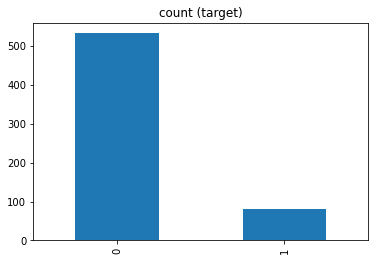

In [75]:
print(df.Category.value_counts())
df.Category.value_counts().plot(kind='bar', title='count (target)')

We have made imputed the missing values found with mean. We have also made the target variable - Category to numeric.
and later reduced the 5 categories '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis','2=Fibrosis', '3=Cirrhosis' to only two Positive and Negative that is 0 and 1 to make target variable simpler as we are intreseted in interpreting and understanding model predictions and not the complexity of data itself.

### 2.2 Outlier correction

We use the IQR - Inter quartile method to detect and remove outliers.

In [76]:
def correct_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.apply(lambda x: x if lower_bound <= x <= upper_bound else column.median())

In [77]:
df_cat = df[['Category', 'Age', 'Sex']]
df_out = df[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE','CHOL', 'CREA', 'GGT', 'PROT']]
df_corrected = df_out.apply(correct_outliers)

In [78]:
result = pd.concat([df_cat, df_corrected], axis=1)
result

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,m,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,m,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,m,46.9,74.70000,36.2,25.9,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,m,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,m,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,62,f,32.0,66.70000,5.9,25.9,7.3,5.57,6.30,55.7,23.3,68.5
611,1,64,f,41.9,102.80000,2.9,44.4,20.0,8.26,3.02,63.0,35.9,71.3
612,1,64,f,41.9,87.30000,3.5,25.9,7.3,8.26,3.63,66.7,64.2,82.0
613,1,46,f,33.0,68.28392,39.0,25.9,20.0,3.56,4.20,52.0,50.0,71.0


<AxesSubplot:xlabel='BIL', ylabel='ALB'>

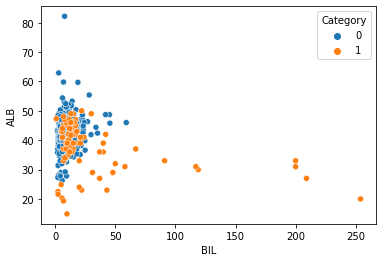

In [79]:
sns.scatterplot(data=df, x='BIL', y='ALB', hue='Category') 

Visualisng the Target variable over factors ALB and BIL

### 2.3 Onehot encoder 'Sex' column

We make the categorical string variables to numeric.

In [80]:
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df[['Sex']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Sex']))
df_encoded = pd.concat([df, encoded_df], axis=1)

In [81]:
df_encoded = df_encoded.drop('Sex', axis = 1)

In [82]:
df_encoded

,Category,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_f,Sex_m
0,0,32,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0.0,1.0
1,0,32,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0.0,1.0
2,0,32,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0.0,1.0
3,0,32,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0.0,1.0
4,0,32,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,62,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,1.0,0.0
611,1,64,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,1.0,0.0
612,1,64,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,1.0,0.0
613,1,46,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,1.0,0.0


### 2.4 Over sampling 

The target variable was extremely imbalanced so we resample the data to balance the classes.

In [83]:
X = df_encoded[['Age', 'Sex_f', 'Sex_m', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT']]
y = df_encoded['Category']

In [84]:
X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X, y)

In [85]:
X_resampled.Sex_f = [0 if sex_f < 0.5 else 1 for sex_f in X_resampled.Sex_f]
X_resampled.Sex_m = [0 if sex_m < 0.5 else 1 for sex_m in X_resampled.Sex_m]

In [86]:
(X_resampled.Sex_f == X_resampled.Sex_m).sum()

0

0    533
1    533
Name: Category, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

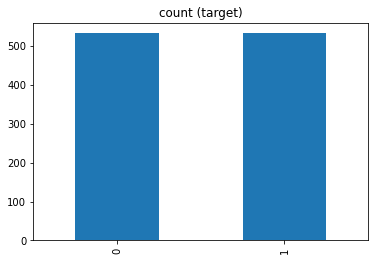

In [87]:
print(y_resampled.value_counts())
y_resampled.value_counts().plot(kind='bar', title='count (target)')

<AxesSubplot:xlabel='BIL', ylabel='ALB'>

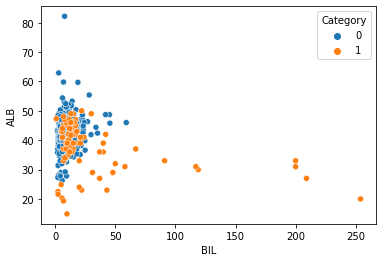

In [88]:
sns.scatterplot(data=df_encoded, x='BIL', y='ALB', hue='Category')

## 3. Modeling

### 3.1 CatBoost Machine Learning Model
Catboost algorithm is in the category of supervised ML algorithm used for regression and classification. Catboost is also an open source algorithm. The name Catboost comes from the two functional parts of the algorithm, Cat - the algorithm is able to handle categorical variables by itself and Boost - gradient boosting technique. 

Unlike in other algorithms where categorical features are processed to convert into numeric format, Catboost can take in these features directly and processes them by itself. This eliminates major overhead of preprocessing involved before sending the data in the algorithm. Catboost can handle categorical and non categorical features effortlessly using ordered encoding method [4]. 

The gradient boosting part of Catboost integrates small predictors together to generate a more accurate and robust model. Catboost implies symmetric trees as it characteristics i.e each decision node of each tree has the same split condition. This makes it faster then XGboost and workable with big or small datasets.


In [89]:
dfx = pd.concat([X_resampled, y_resampled], axis=1)

In [90]:
fit, test = train_test_split(dfx, train_size=control.fit_test_split, random_state=42)
train, valid = train_test_split(fit, train_size=control.train_valid_split, random_state=42)

In [91]:
model = catboost.CatBoostClassifier(
learning_rate = control.model_params["learning_rate"],
iterations = control.model_params["iterations"],
early_stopping_rounds = control.model_params["early_stopping_rounds"],
depth = control.model_params["depth"])
    
model.fit(train[control.x],train[control.y], verbose=50, 
              eval_set = (valid[control.x],valid[control.y]))

0:	learn: 0.6779793	test: 0.6786990	best: 0.6786990 (0)	total: 14ms	remaining: 14s
50:	learn: 0.2969406	test: 0.3066877	best: 0.3066877 (50)	total: 74ms	remaining: 1.38s
100:	learn: 0.1710046	test: 0.1854899	best: 0.1854899 (100)	total: 135ms	remaining: 1.2s
150:	learn: 0.1189015	test: 0.1375443	best: 0.1375443 (150)	total: 194ms	remaining: 1.09s
200:	learn: 0.0916773	test: 0.1134579	best: 0.1134579 (200)	total: 257ms	remaining: 1.02s
250:	learn: 0.0737141	test: 0.0982798	best: 0.0982798 (250)	total: 317ms	remaining: 945ms
300:	learn: 0.0620492	test: 0.0889623	best: 0.0889623 (300)	total: 377ms	remaining: 875ms
350:	learn: 0.0533421	test: 0.0820479	best: 0.0820479 (350)	total: 437ms	remaining: 808ms
400:	learn: 0.0468932	test: 0.0774649	best: 0.0774649 (400)	total: 506ms	remaining: 757ms
450:	learn: 0.0414451	test: 0.0735415	best: 0.0735415 (450)	total: 567ms	remaining: 690ms
500:	learn: 0.0370797	test: 0.0702609	best: 0.0702609 (500)	total: 627ms	remaining: 625ms
550:	learn: 0.0337380

## 4. Global Explainable Techniques
### 4.1 Global Explainability: Permutation Feature Importance

As explained before we will first analyse the feature importance using the Permutation Feature Importance which is a global explainabilty technique. Using this technique we will be able to identify the most crucial features for our CatBoost model. In this technique the value of each feature is permuted and then the error in predictions is analysed. If changing a features value results in higher model error then that feature can be considered as important as it is able to influence the result more and was crucial for the model's decision. Similarly, if permuting value of a feature has little to no impact on the prediction error then that feature can be classified as less important to the model, as it did not influence the decision of the model much.

In [97]:
from sklearn.inspection import permutation_importance

# Calculate feature importances
perm_importances = permutation_importance(model, test[control.x], test[control.y], n_repeats=30, random_state=42)

# Get feature importances and their indices
perm_feature_importances = perm_importances.importances_mean
perm_feature_indices = perm_importances.importances_mean.argsort()[::-1]

# Print top features
top_perm_features = test[control.x].columns[perm_feature_indices]
print("Top Permutation Feature Importances:", top_perm_features)


Top Permutation Feature Importances: Index(['AST', 'GGT', 'BIL', 'ALP', 'PROT', 'CHOL', 'ALT', 'ALB', 'Age', 'CHE',
       'Sex_m', 'Sex_f', 'CREA'],
      dtype='object')


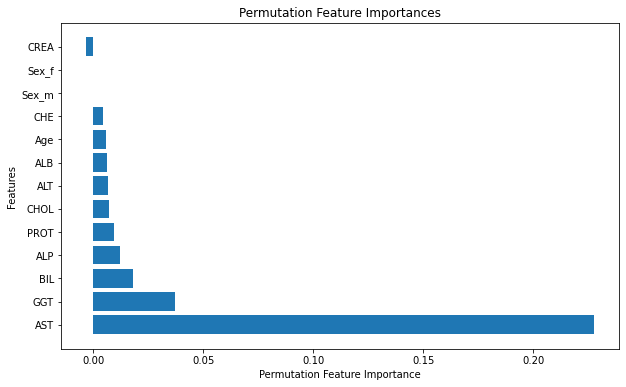

In [100]:
# Visualize permutation feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_perm_features)), perm_feature_importances[perm_feature_indices], align='center')
plt.yticks(range(len(top_perm_features)), top_perm_features)
plt.xlabel('Permutation Feature Importance')
plt.ylabel('Features')
plt.title('Permutation Feature Importances')
plt.show()

#### Insights
In the above figure we can see a ranked list of feature importance displayed as a bar graph for the model. With the least important feature appearing first. 
From the graph, we can clearly observe that the feature "AST" is the most significant feature and has a great influence on the model's predictions. And we can consider it to be the important indicator to classify if a blood donor is Hepatitis C positive or not. In contrast, the features "CREA" and "Sex" has little to no influence on the model's decision making process and hold hence hold the least importance to the model. This makes sense as we know that biological gender of a person does not influence the presence of Hepatitis C Virus. This visualisations gives us clear insights into which variable are the most crucial in determining the model outcome. 


## 4.2 Model Explanation: SHAP (SHapley Additive exPlanations)
SHAP, which stands for Shapley Additive Explanations, is a technique devised by Lundberg and Lee to provide explanations for machine learning model predictions[2]. It is based on game theory and employs Shapley values, which are regarded as the most optimal method for attributing contributions in a cooperative game[2].


Primarily, SHAP explains how a prediction was made. Shap calculates the contribution of each feature in model's predictions to helps us identify which aspects had more significance in making a single prediction by the model, thereby helping us understand the 'why' for the prediction. This can also help us understand the model's behaviour and make it more transparent. 


In [101]:
shap.initjs()

### 4.2.1 Tree Shap
TreeSHAP is a variation of the SHAP technique designed particularly for tree-based machine learning models such as decision trees, random forests, and gradient boosted trees and was developed by Lundberg and his colleagues. TreeSHAP was devised as a more efficient and model-specific alternative[2].

We are trying to decipher the CatBoost Model which is a gradient boosted tree, thus we will use the TreeSHAP variation to explain our model. We  us the TreeExplainer to get SHAP values and plot it to understand the contribution of each feature in the tree base model.


Drawbacks of TreeSHAP: Sometimes TreeSHAP may not generate intuitive results, meaning the explanation for a specific prediction made by the model may not be something that makes sense to us based on our understanding of what we think should happen.  


In [102]:
# compute the SHAP values for every prediction in the validation dataset
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)


## 4.2.2 Explain a single patient chances of being Hep C positive patient


The magnitude of SHAP values shows how much a feature affects the outcomes. So here SHAP values will help us figure out which features and feature values of a particular patient data are causing the model to make a certain prediction for that patient. SHAP values help us understand how the model is predicting one result over another.

For our dataset, a large positive SHAP value means the model will think it is more likely that the patient does not have Hepatitis C or is Hep C negative. Whereas, a large negative SHAP value indicates the patient is more likely to carry the Hep C virus. In the plot below the SHAP values range between positive and negative numbers. For a positive SHAP value the model's prediction will go towards one result while a negative value pushes the prediction towards another outcome.  


In [103]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

### 4.2.3 SHAP Feature Importance

SHAP feature importance can be thought of as an alternative to Permutation feature importance technique we explored before. However there is a significant difference between these two techniques. Permutation feature importance calculates the importance of a feature by randomly shuffling the values by permuting them and then measuring the prediction error to asses how much a feature impacts the model's decision making. On the other hand, SHAP feature importance measures the contribution of each feature to the prediction. 

The plot below shows the SHAP feature importance scores by listing them in decreasing order of importance, with the most important feature first. And to create this order it uses mean absolute "Shapely Values" for each feature.

Shapely values help us understand how different factors of a dataset affect the model's ability to make a prediction. For example in a group project how will a grading professor decide which student deserves more credit and which student did not contribute much? He will do so by figuring out what work was done by each team member and based on the work done by each student accordingly assign the credit. Similarly, Shapely values are useful in making us understand how much feature contributed to the prediction or which features were more crucial for a certain prediction.  

Now to determine global feature importance, we calculate the average absolute Shapley values for each feature across the entire dataset. And based on these average values arrange the features in a ranked list. 

Lets visualize this to see how much these features affect the outcome. 


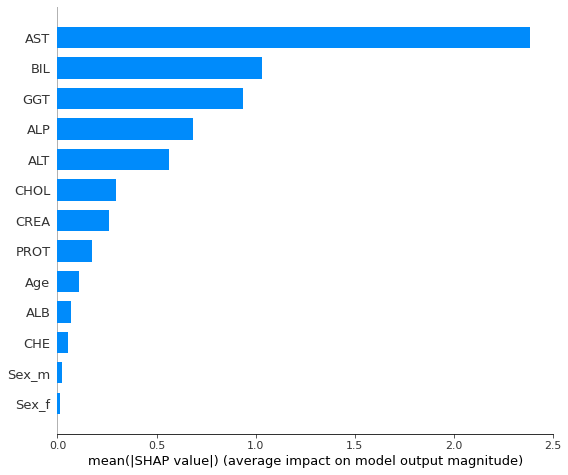

In [104]:
shap.summary_plot(shap_values, test[control.x], plot_type='bar')

#### Insights

In the above visualisation we can see the SHAP feature importance for our CatBoost model that we have trained on the Hepatitis C patients dataset. Here,  we can see that AST is the most important feature to the model and the magnitude of its Average impact on the model output is 2.5 or 25%(represented on x axis). 

The SHAP feature importance plot provides information of importance scores of the feature. But that is it, we still don’t know how the model actually works. Now to get a deeper and more complete understanding of the model, we will explore summary plots, which will help us understand the model behaviour. 

### 4.2.4 Summarize the impact of all features over the entire dataset

From the summary plot below, each data point for each feature like 'AST', 'BIL', etc. has been plotted along a row. Each data point in this plot shows how much each feature affects the models prediction. This influence is measured in log odds of having Hep C in our case. In the visualisation below we can clearly see the features which have a significant influence on the prediction like 'AST', 'BIL', etc. and we can also see other features like 'Sex_m', 'Sex_f', 'Age' have little to no impact on the prediction, which makes sense as Hep C is not related to gender. In a row each data point is marked by an individual point in the plot, if there is higher density at a given data value points are stacked vertically in the same row. The red coloured points give the information that the feature value is higher and blue color shows the feature value is lower. The summary plot summarizes the contribution of all features to the model's outcome.

For example, in the feature 'AST', the smaller values in blue contribute negatively to the model. The higher values contribute positively to the model's prediction.   


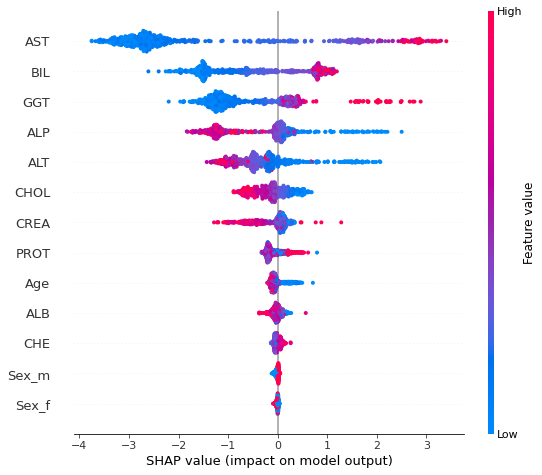

In [107]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

The summary plot shows impact of feature values on the model prediction, but for a more detailed and accurate view of this relationship, we will now look at SHAP dependence plots.

## 4.3 SHAP Dependence Plot

SHAP feature dependence plot is yet another Global Explainability technique. These can be thought of as an alternative to Partial dependence plots, but SHAP Dependence plots also show the average effect of features on the predictions. They help us understand the average impact and variance in impact of the features on the model. It helps us understand feature interactions and how feature interactions can lead to variations in the prediction. It essentially gives an account of various different possible outcomes.

When interactions between features in considered, we can see a higher variance along the y axis in a SHAP dependence plot. These plots are a helpful tool to understand influence of features especially where feature interactions have a more crucial impact.  


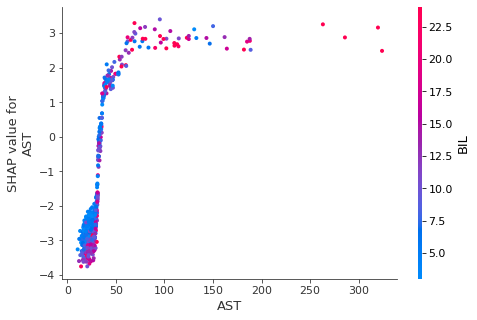

In [109]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("AST", shap_values, X)

### 4.3.2 SHAP Dependence Plots for all Features

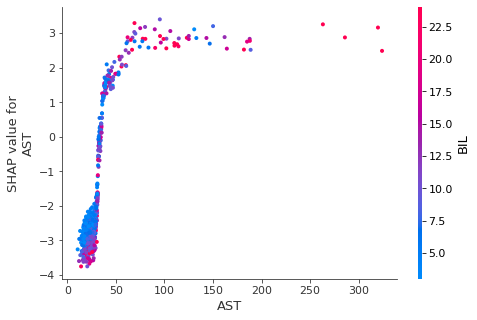

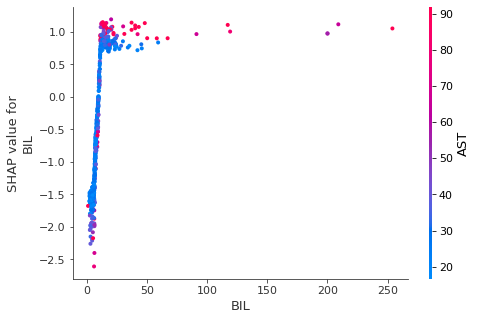

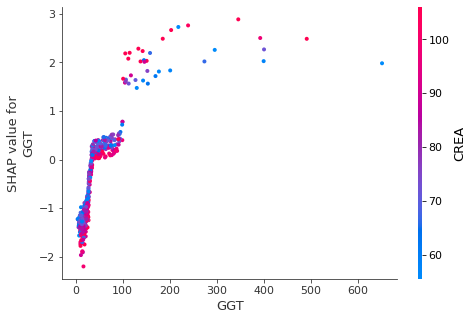

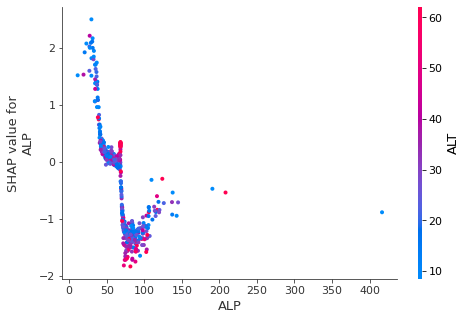

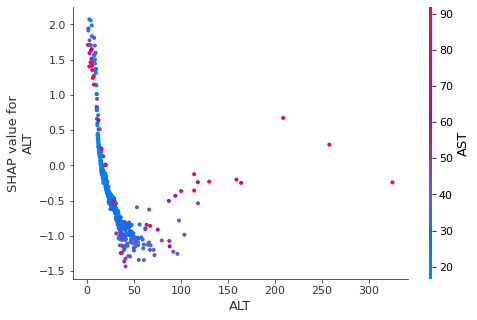

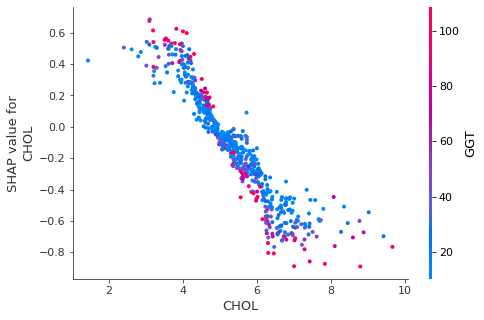

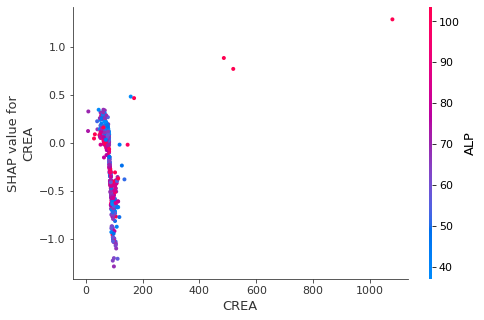

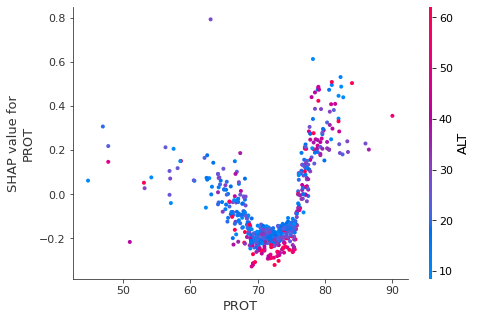

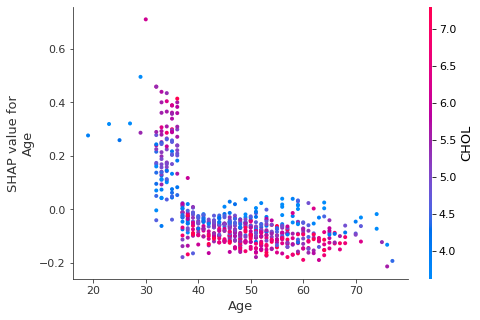

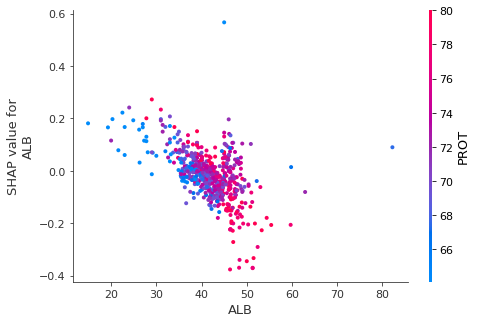

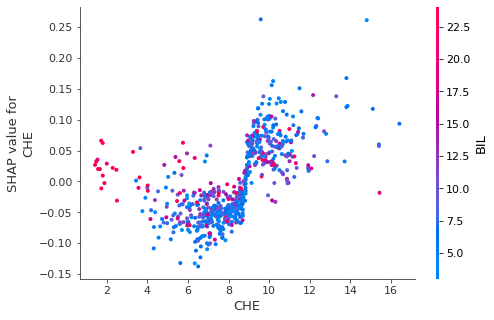

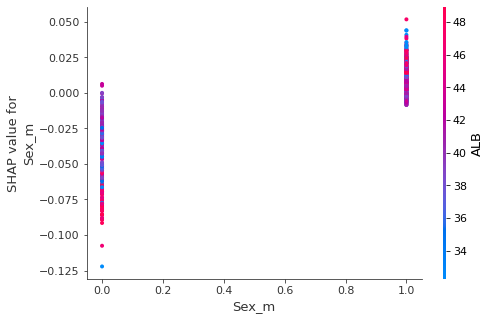

In [158]:
# sort the features indexes by their importance in the model
# (sum of SHAP value magnitudes over the validation dataset)
top_inds = np.argsort(-np.sum(np.abs(shap_values), 0))

# make SHAP plots of the three most important features
for i in range(12):
    shap.dependence_plot(top_inds[i], shap_values, X)

#### Insights
The CatBoost model that we trained before is very complicated. Using SHAP dependence plots, we can make things easier to understand. When plot data points for all patients, we can see these plots show influence of changes in the value of a specific feature on the model's predictions. 

We have plotted all various features against each other to see the interactions' influence. In these plots we can see the x-axis shows the data points of the feature in the dataset, y-axis represents the SHAP value for that feature and the colorbar shows the data points (color coded) of the feature it is plotted against. We can see from the plots the variance in range along y-axis is higher when the interaction between the features has a significant impact. In other words, when there is wider dispersion along the y-axis it shows that the influence of a feature varies due to its interaction with other features. Based on how a feature interacts with other features, its significance changes. These plots are thus a crucial tool to understand model behaviour as it shows how influence of a feature can change depending on different situations and the model is sensitive to these feature interactions. 

For example, in the graph above where we plotted ALT against AST, we see that Shapely values on y-axis varies between -1.5 to 2.0 which shows a higher impact of interactions between the two features. Whereas, in the last graph where we plotted gender related feature - Sex_m  with ALB, we see the shapely values on y-axis varies only between -0.125 to 0.05, which shows the interaction has less significance.

We can also see, in the graph which shows interactions between AST and ALT again, when ALT values are high(x-axis), values of AST(colorbar) are also high. Moreover, when is ALT is very low, AST values are very high. While in the last graph we can clearly see there is little to no interaction between ALB and gender.


### 4.3.3 Clustering Shapley Values

We can cluster Shapely values associated with each feature to understand overall effect of all the features on the model. Using this we can arrange the shapely values associated with each feature in a single graph by stacking these features, and also group features that have a similar explanation. In a way, we sorting these features based on how important the model considers them for its predictions.

It is important to note that the unit of measure meant for all SHAP values is same, therefore, we can effectively cluster the features together based on their Shapely values. Clustering if these values help us identify patterns and similarities between features and how the model understands various data points.


In [112]:
shap.force_plot(explainer.expected_value, shap_values, train[control.x])

#### Insights
The above interactive plot displays stacked SHAP values of various features grouped together based on the shapely scores. On the x-axis we iterate through all the data points the x-axis, we can also see individual feature effect over each data point using the drop down menu on x-axis. The blue color in the graph value represents lower predictions while red color represents higher predictions, higher density of stacked blue points indicates lower contribution to prediction and vice versa.

In the above visualisation, we can see a group of distinct data points on the right in red with higher SHAP values that shows these points have a higher contribution in prediction of the patient being Hepatitis C positive. Basically, the model predicts a higher likelihood of Hep C. This insight is clear because of the grouped and stacked SHAP values and tells us how these points collectively affect the model's outcome. The drop-down menu on the y-axis gives an option to sample the order by similarity. We can also view each feature individually using this drop-down menu. The interactive plot gives the values of data points when we hover over the graph.


### 4.4 Global Surrogate Model

A global surrogate is a much simpler and easily interpretable model than the black box model, these simpler models are made to replicate the predictions generated by the black box model. Once the surrogate model replicates the predictions like the black box model, we use the interpretability of the surrogate model to understand the inner workings and behaviour of the black box. 

Since a global surrogate model is build using sinpler models like regression or decision trees, in our case we use Decision rree to interpret the Catboost model. Decision tree is selected since it is faster, easier to understand and a lot of tools are available to visualize the decision tree generated in the end. Explanation of this decision tree will help in explaining our Catboost model. The process to make a Global Surrogate model is as follows: 

1. A special technique is used to make the decision tree learn how to catboost model makes it predictions. In this technique, the training features used by the Catboost model are used as training features. The predictions on training features by the Catboost model is used as the target features during training the Catboost model. 

2. Decision tree is then used to make predictions on Test data. To check whether the decision tree has properly replicated the Catboost model, an error measure is used to calculate the deviation between Catboost's predictions and Decision Tree's predictions. In our case, we used R-squared as the error metric to compare the two model's predictions. R-squared shows the variance captured by the surrogate model in percentage. For example, if R-squared is 1 then the surrogate model is an exact replica of the black box model. On the other hand, if R-squared is 0 then the surrogate model failed to replicate the black box model completely. 

3. After tuning the surrogate model to achieve the desired R-squated, i.e the surrogate model is nearly an exact replica of the black box model. We use the surrogate model's strength of visualization and interpretability to decipher the black box model. 

In general, global surrogate models bridge the gap between complex models and human interpretability. R-squared metric quantifies this interpretability of black box models.

#### 4.4.1 Build a decision tree to explain CatBoost model

In [117]:
new_target = model.predict(train[control.x]) # get the predictions of the black box model on training set

In [121]:
from sklearn.tree import DecisionTreeClassifier
# defining the interpretable decision tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=10)

# fitting the surrogate decision tree model using the training set and new target
dt_model.fit(train[control.x],new_target)

DecisionTreeClassifier(max_depth=5, random_state=10)

In [124]:
interpreted = dt_model.predict(train[control.x]) #make predictions

In [126]:
 from sklearn.metrics import r2_score
#compute R2 to measure how well surrogate model interprets black box model
r2_score(new_target, interpreted)

0.8998514253876868

#### Insights
We got R squared score of 0.89 which is pretty close to 1 and hence, our surrogate model(decision tree model) was able to explain the behaviour of our black box model(CatBoost) very well. 

Hence, we can use this as a surrogate model and now we will interpret our decision tree model.


In [150]:
train[control.y].unique() 

array([0, 1], dtype=int64)

#### 4.4.2 Explain Surrogate Model: Feature Importance

To explain our surrogate model decision tree we first check the feature importance. 

[0.         0.         0.         0.01107162 0.02042645 0.02446525
 0.69135088 0.08371664 0.         0.         0.10518383 0.06378534
 0.        ]


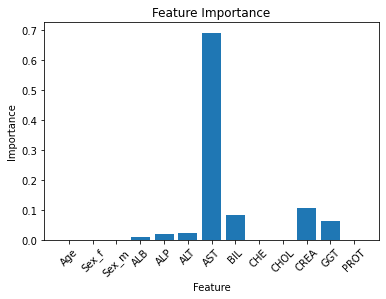

In [157]:
# Get feature importances from the trained model
feature_importances = dt_model.feature_importances_

print(feature_importances)


# Visualize feature importances
plt.bar(feature_names, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

#### Insights 
We can see here the decision tree treats AST as the most important feature to make predictions and Age, Gender as the least important features. Which can also be seen in our black box CatBoost model.

#### 4.4.3 Explain Surrogate Model : As a Tree

Our surrogate model is a decision tree, one strength a Decision tree has is that we visualise the splits in the DT to arrive at a prediction. This makes predictions made by the DT easier to interpret.

Unlike in complex models like Neural networks and CatBoost, Decision is able to provide the transperancy in decisions. The decision making process of a Decision Tree is a series of starightforward steps where each node in the tree represents a feature and a split in the feature values. Once this node is created the Decision Tree evaluates the data points, depending in the data point it goes to next level of nodes based on the split condition. This way a complete tree is created iterating over all data points and eventually classifying the dataset. 

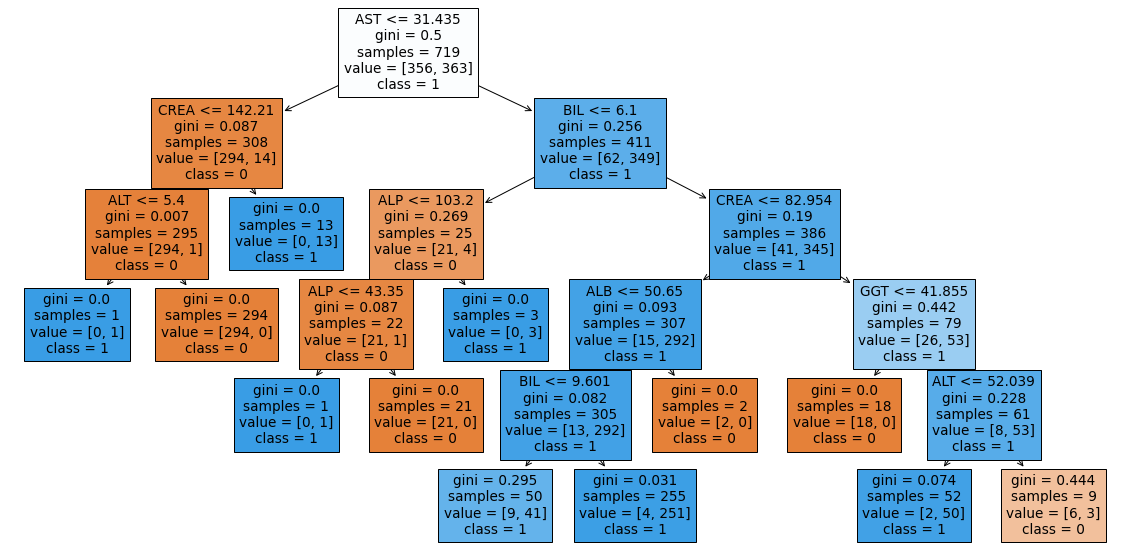

In [154]:
from sklearn.tree import plot_tree
# Alternatively, you can use matplotlib to visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

#### Insights

Looking at the Tree visualisarion above we can now see how the model is making decsions. Decision Trees are very logical and easy to comprehend and thus make the model transparent and helps us understand the inner workings of the model. In the visualisation above we can clearly see how the splits were made. For example, in the root node, a data point with AST value <+ 31.435 was classified as a Hep C negative branch while data points with AST values higher than 31.435 were classified as Hepatitis C positive branch and so on.

As the visualised tree shows the splits made by each feature, it becomes very easy for us to trace a the path of a datapoint to its final classification and understand which features impacted this decision made by the model.

Prediction comparision from Catboost and Surrogate model achieved an Rsquared of 89%, hence we can confidently say that the surrogate model replicated our complex Catboost model and we can use the surrogate model to explain the behaviour of Catboost model. The feature importance extracted from DT also verifies this, a higher R-squared value indicates that both models are comparable and we can thus use this simplified decision tree to interpret the complex model making it more transparent, easier to understand and trustworthy.


# 5. Conclusion

Our journey throught this project helped us explore various global explainable techniques to understand the workings of a complex black box model and know-how of how a black box model arrives at a decision. We achieved our previously established objective to use AI to make complex models easier to comprehend by undersanding the inner workings in depth and thus making the model transparent and its predictions trustworthy.

The main objective of our project was to famililarize ourselves with the understanding and insights using necessary tools to make our Catboost model interpretable to human. Thereby, making the decision making process of a model transparent, so that we can trust the results given by a black box model.

We achieved this by unraveling the inner workings of our Machine Learning model by using various techniques like understanding feature importance using the Permutation Feature Importance technique which gave us an idea about which features are more crucial to the model. We also looked into the SHAP (SHapley Additive exPlanations) values, and concluded that the interactions between the various features also affects the predictions made by the model. We analysed these complex feature interactions using Shap Dependence Plots which gave us an indepth understanding of how these feature interactions influence the predictions in different situations. We later made a Cluster Plot of SHAP values which helped us understand the collective influence of these features on the model.

We then used the Global Surrogate Model technique to interpret our CatBoost model using a decision tree model. We also interpreted this surrogate model to effectively bridge the gap between the two models. The decision tree gave a clear visualization on the decisions and splits on each node, where each node represented a feature and each leaf node represented a predicted class. Traversing through the tree, we could easily trace the path followed by a data point to arrive at its final classification and understand which features lead it to this classification. By visualiying our surrogate model as a tree, we obtained crucial insights to identify patterns and biases which helped us build trust in the models outcome. This makes our surrogate model transparent and interpretable. 

We achieved R-squared value of 89% on prediction comparision of our Catboost model with our surrogate decision tree model. This boosts our confidence in our surrogate model and we can say that the surrogate model is able to successfully mimic the complez black box model, thereby, giving us a simplified version which is easier for human comprehension and helped us in our objective to build trust in our black box model. 

Overall we analysed over five Global Model Agnostic techniques to interpret our models.

In conclusion, we were successfully able to explain and initially complex Catboost model using various Global Explainable AI techniques. We were able to explain how and why the model arrived at a prediction. With this project we can shed some light on the importance of Explainable AI and its use case which will enable humans to gain trust in the black box machine learning models. Explainable AI plays an important role in shaping the future of AI due to its transparency. The knowledge gained through this is important becasue it will help design AI systems that can use AI capabilities in a more transparent and responsible form, making it possible for AIs integration into various domains like Finance and Healthcare.

# 6. References
1. https://medium.com/@aieducator894/explainable-artificial-intelligence-xai-9045c885938e
2. Interpretable Machine Learning, by Christoph Molnar - https://christophm.github.io/interpretable-ml-book/
3. https://medium.com/@aieducator894/explainable-artificial-intelligence-xai-9045c885938e
4. How CatBoost algorithm works - https://pro.arcgis.com/en/pro-app/latest/tool-reference/geoai/how-catboost-works.htm#:~:text=CatBoost%20is%20a%20supervised%20machine,gradient%20boosting%20(the%20Boost).
5. https://insidelearningmachines.com/interpret_decision_trees/
6. https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset?resource=download - for dataset
7. https://github.com/shap/shap
8. https://marcotcr.github.io/lime/tutorials/Tutorial%20-%20continuous%20and%20categorical%20features.html
9. https://archive.ics.uci.edu/ml/datasets/HCV+data